# IA353 - Redes Neurais
# EFC3 - Questão 5 -2

## Projeto de Autoencoder Convolucional para remoção de Ruido de imagens RGB

**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):**  Marcelo Eduardo Pederiva

Para essa questão propuz a utilização do autoencoder convolucional para correção de ruidos na imagem de entrada. 

Para isso, utilizei a base de dados CIFAR100, o qual possui uma grande base de dados, promovido pelo proprio keras, com imagens (32x32) coloridas classificadas entre 100 objetos. 

### Importando as bibliotecas

In [1]:
import tensorflow as tf
import os

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten,UpSampling2D, Input, Conv2DTranspose, Reshape
from keras.optimizers import adam
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


### Obtendo os dados do CIFAR100

In [2]:
data = tf.keras.datasets.cifar100
(x_train, y_train),(x_test, y_test) = data.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

### Função para adicionar um ruido nas imagens do dataset 

In [4]:
def noisy(data,sc):
    noise = np.random.normal(loc=0.0, scale=sc, size=data.shape)
    data = data + noise
    data = np.clip(data, 0., 1.)
    return data

### Adicionando ruido na base de dados de treinamento e teste

In [5]:
x_train_noisy = noisy(x_train,0.1)
x_test_noisy = noisy(x_test,0.1)

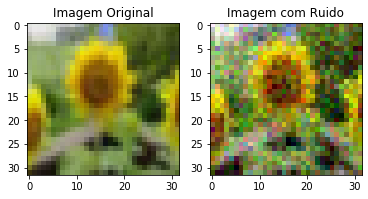

In [6]:
plt.subplot(1,2,1)
plt.imshow(x_train[12])
plt.title('Imagem Original')
plt.subplot(1,2,2)
plt.imshow(x_train_noisy[12])
plt.title('Imagem com Ruido')
plt.show()

### Arquitetura do Autoencoder Convolucional 

Para esse problema, com imagens coloridas de diversas categorias, iremos utilizar o autoencoder convolucional. 

Como observamos nas Redes Neurais Convolucionais, a utilização de camadas convolucionais resulta numa melhor caracterização da imagem de entrada. 

Dessa forma, através de uma sequencia de camadas convolucionais e camadas pooling iremos arquitetar a etapa de codificação. Já na etapa de decodificação utilizaremos a camada convolucional de transposição (Conv2DTranspose) e a camada UpSampling2D.

Enquanto a camada UpSampling2D aumenta a dimensão da imagem de entrada, a Conv2DTranspose executa a operação reversa da camada convolucional.

Funcionamento da Camada Convolucional de Transposição (Conv2DTranspose)


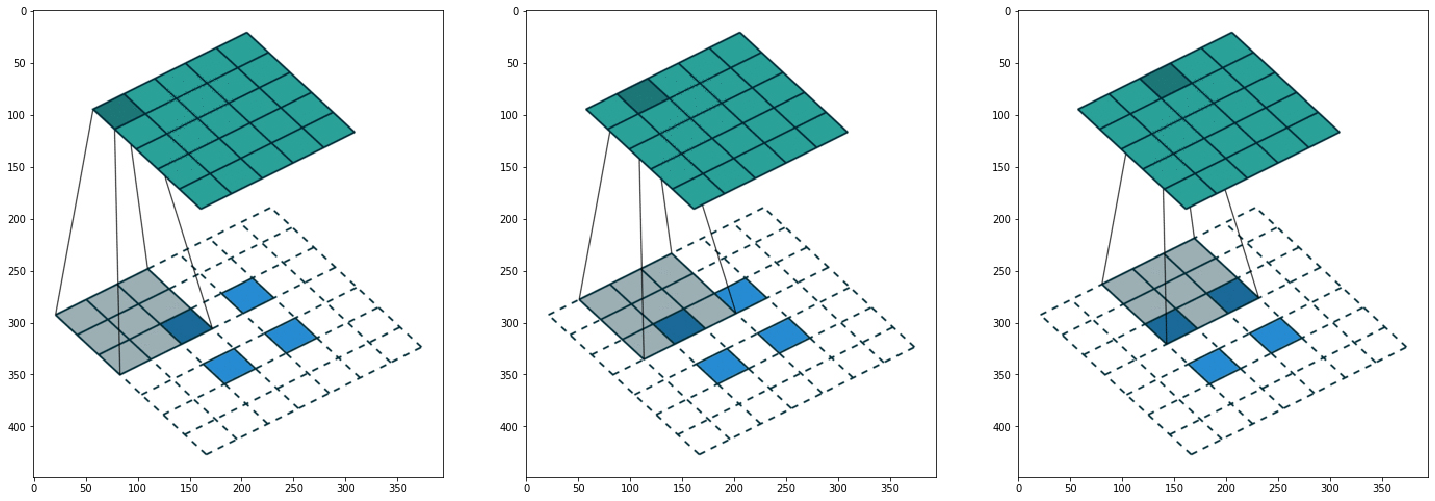

In [17]:
from PIL import Image
img1 = Image.open('img1.jpg')
img2 = Image.open('img2.jpg')
img3 = Image.open('img3.jpg')
print('Funcionamento da Camada Convolucional de Transposição (Conv2DTranspose)')
fig = plt.figure(figsize=(25, 20))

plt.subplot(1,3,1)
plt.imshow(img1)
plt.subplot(1,3,2)
plt.imshow(img2)
plt.subplot(1,3,3)
plt.imshow(img3)
plt.show()

In [10]:
input_img = Input(shape=(32,32,3))

encoded = Conv2D(32, (3, 3), padding="same", activation="selu")(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(64, (3, 3), padding="same", activation="selu")(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(128, (3, 3), padding="same", activation="selu")(encoded)
encoded = Conv2D(256, (3, 3), padding="same", activation="selu")(encoded)

decoded = Conv2DTranspose(128, (3, 3), padding="same", activation="selu")(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2DTranspose(64, (2, 2), padding="same", activation="selu")(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2DTranspose(32, (2, 2), padding="same", activation="selu")(decoded)
decoded = Conv2DTranspose(3, (3, 3), strides = (1,1), padding="same", activation="sigmoid")(decoded)

autoencoder = Model(input=input_img, output=decoded)

In [11]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 256)         2951

In [13]:
autoencoder.compile(optimizer = "adam", loss = "mse")
history = autoencoder.fit(x_train_noisy, x_train, batch_size = 256, nb_epoch = 30, verbose = 1)

Epoch 1/30
50000/50000 [==============================] - 19s 380us/step - loss: 0.0095
Epoch 2/30
50000/50000 [==============================] - 20s 396us/step - loss: 0.0061
Epoch 3/30
50000/50000 [==============================] - 19s 373us/step - loss: 0.0051
Epoch 4/30
50000/50000 [==============================] - 18s 368us/step - loss: 0.0046
Epoch 5/30
50000/50000 [==============================] - 18s 367us/step - loss: 0.0042
Epoch 6/30
50000/50000 [==============================] - 19s 371us/step - loss: 0.0040
Epoch 7/30
50000/50000 [==============================] - 18s 367us/step - loss: 0.0037
Epoch 8/30
50000/50000 [==============================] - 18s 366us/step - loss: 0.0036
Epoch 9/30
50000/50000 [==============================] - 18s 366us/step - loss: 0.0035
Epoch 10/30
50000/50000 [==============================] - 18s 366us/step - loss: 0.0033
Epoch 11/30
50000/50000 [==============================] - 18s 366us/step - loss: 0.0032
Epoch 12/30
50000/50000 [=====

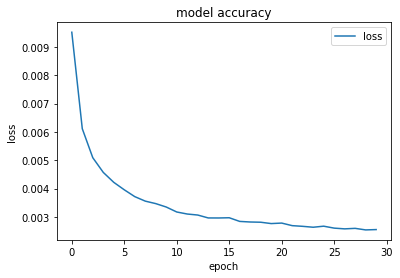

In [14]:
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='best')
plt.show()

Text(0.5, 1.0, ' Imagem Original')

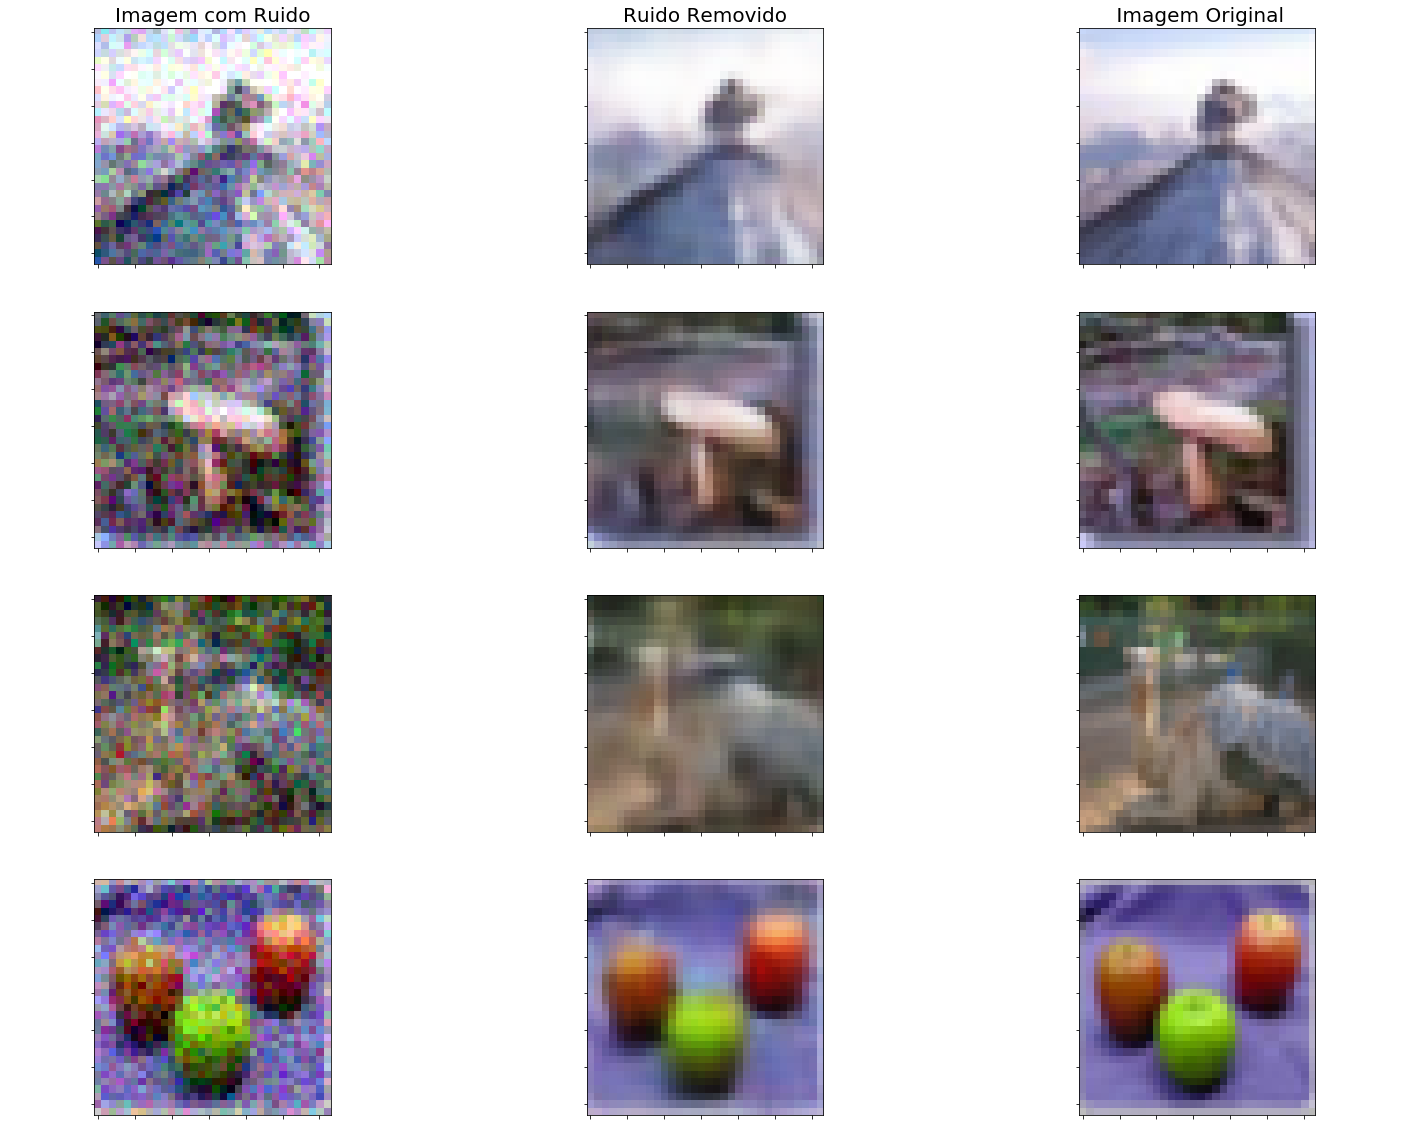

In [16]:
%matplotlib inline
x_test_denoised = autoencoder.predict(x_test_noisy)
fig = plt.figure(figsize=(25, 20))
plt.axis('off')
plt.grid(b=None)
ax = []
row = 4
column = 3
for i in range(0,row*column,3):
    
    ax.append(fig.add_subplot(row,column,i+1))
    plt.imshow(x_test_noisy[i])
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])

    ax.append(fig.add_subplot(row,column,i+2))
    plt.imshow(x_test_denoised[i])
    ax[i+1].set_yticklabels([])
    ax[i+1].set_xticklabels([])


    ax.append(fig.add_subplot(row,column,i+3))
    plt.imshow(x_test[i])
    ax[i+2].set_yticklabels([])
    ax[i+2].set_xticklabels([])


ax[0].set_title('Imagem com Ruido', fontsize=20)
ax[1].set_title('Ruido Removido', fontsize=20)
ax[2].set_title(' Imagem Original', fontsize=20)


## Avaliação dos Resultados

Podemos observar acima que o projeto de remoção de ruido obteve um resultado significante.

O algoritmo conseguiu abstrair muitas caracteristicas da imagem original com ruidos. Comparando os resultados com a imagem original, observamos que o resultado representa uma versão mais embassada da imagem original. A utilização de imagens maiores ou de um aperfeiçoamento na arquitetura do autoencoder provavelmente resultará numa aproximação mais precisa.